Task 1: Eigenvalue Stability Analysis
Transition Matrix A:
[[1.2  0.1 ]
 [0.05 1.1 ]]

Eigenvalues: [1.23660254 1.06339746]
Eigenvectors:
[[ 0.9390708  -0.59069049]
 [ 0.34372377  0.80689822]]

Spectral Radius: 1.237
Interpretation: Spectral radius > 1 indicates unstable growth


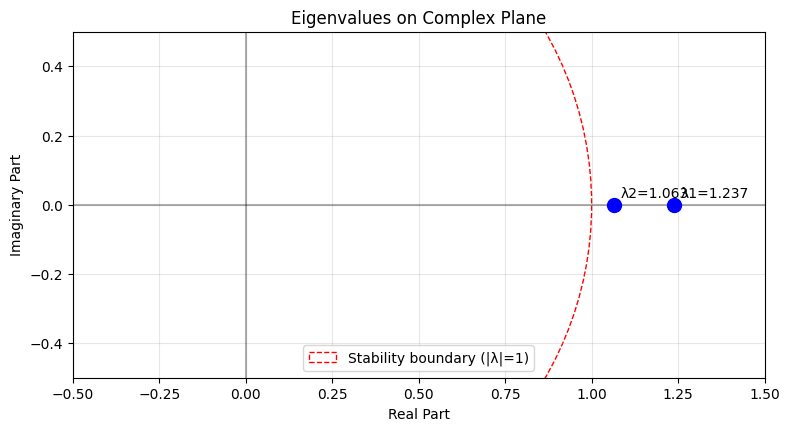

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Eigenvalue Analysis
A = np.array([[1.2, 0.1], [0.05, 1.1]])
eigenvalues, eigenvectors = np.linalg.eig(A)
spectral_radius = np.max(np.abs(eigenvalues))

print("Task 1: Eigenvalue Stability Analysis")
print("=" * 50)
print(f"Transition Matrix A:\n{A}")
print(f"\nEigenvalues: {eigenvalues}")
print(f"Eigenvectors:\n{eigenvectors}")
print(f"\nSpectral Radius: {spectral_radius:.3f}")
print("Interpretation: Spectral radius > 1 indicates unstable growth")

# Plot eigenvalues on complex plane
fig, ax = plt.subplots(figsize=(8, 6))
circle = plt.Circle((0, 0), 1, color='red', fill=False, linestyle='--', label='Stability boundary (|λ|=1)')
ax.add_artist(circle)

# Plot eigenvalues
ax.scatter(eigenvalues.real, eigenvalues.imag, color='blue', s=100, zorder=5)
for i, (re, im) in enumerate(zip(eigenvalues.real, eigenvalues.imag)):
    ax.text(re+0.02, im+0.02, f'λ{i+1}={re:.3f}', fontsize=10)

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 0.5)
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_title('Eigenvalues on Complex Plane')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.savefig('eigenvalues_plot.png', dpi=300, bbox_inches='tight')
plt.show()


Task 2: Exponential Growth Analysis
Initial Population (P₀): 1000
Growth Rate (r): 0.03
Population at t=20: 1822.1
Maximum growth rate at t=20: 54.66


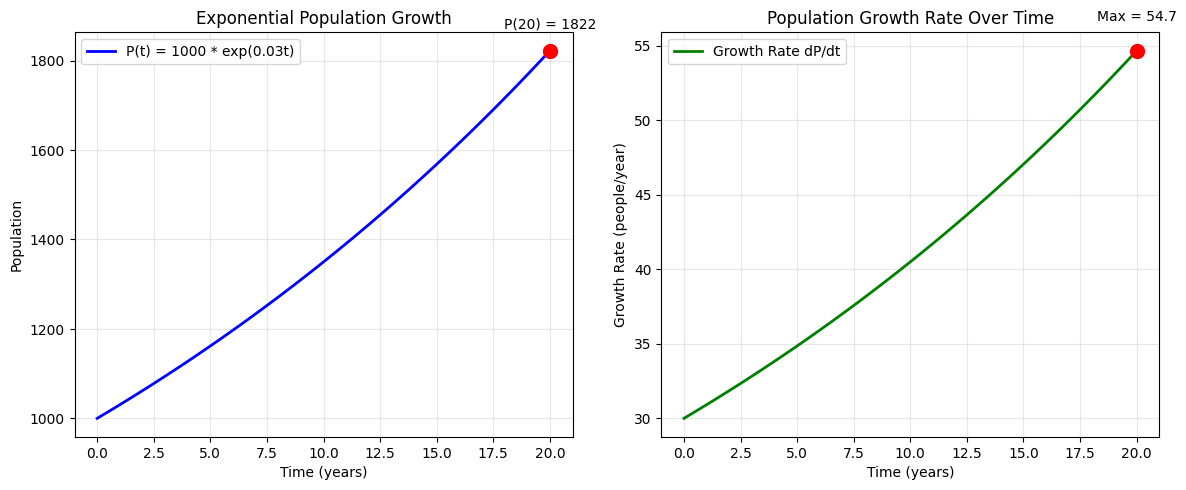

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Task 2: Exponential Growth Analysis
P0 = 1000
r = 0.03
t = np.linspace(0, 20, 100)
P_t = P0 * np.exp(r * t)

# Calculate derivative (growth rate)
dP_dt = P0 * r * np.exp(r * t)

print("\nTask 2: Exponential Growth Analysis")
print("=" * 50)
print(f"Initial Population (P₀): {P0}")
print(f"Growth Rate (r): {r}")
print(f"Population at t=20: {P0 * np.exp(r * 20):.1f}")
print(f"Maximum growth rate at t=20: {P0 * r * np.exp(r * 20):.2f}")

# Plot population growth
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Population growth plot
ax1.plot(t, P_t, 'b-', linewidth=2, label=f'P(t) = {P0} * exp({r}t)')
ax1.scatter([20], [P0 * np.exp(r * 20)], color='red', s=100, zorder=5)
ax1.text(20, P0 * np.exp(r * 20) + 50, f'P(20) = {P0 * np.exp(r * 20):.0f}', 
         ha='center', fontsize=10)
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Population')
ax1.set_title('Exponential Population Growth')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Growth rate plot
ax2.plot(t, dP_dt, 'g-', linewidth=2, label='Growth Rate dP/dt')
ax2.scatter([20], [P0 * r * np.exp(r * 20)], color='red', s=100, zorder=5)
ax2.text(20, P0 * r * np.exp(r * 20) + 2, f'Max = {P0 * r * np.exp(r * 20):.1f}', 
         ha='center', fontsize=10)
ax2.set_xlabel('Time (years)')
ax2.set_ylabel('Growth Rate (people/year)')
ax2.set_title('Population Growth Rate Over Time')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig('exponential_growth_plot.png', dpi=300, bbox_inches='tight')
plt.show()


Task 3: Poisson Distribution Analysis
Rate parameter (λ): 5
Expected value E[X]: 5
Variance Var(X): 5
Standard deviation: 2.236


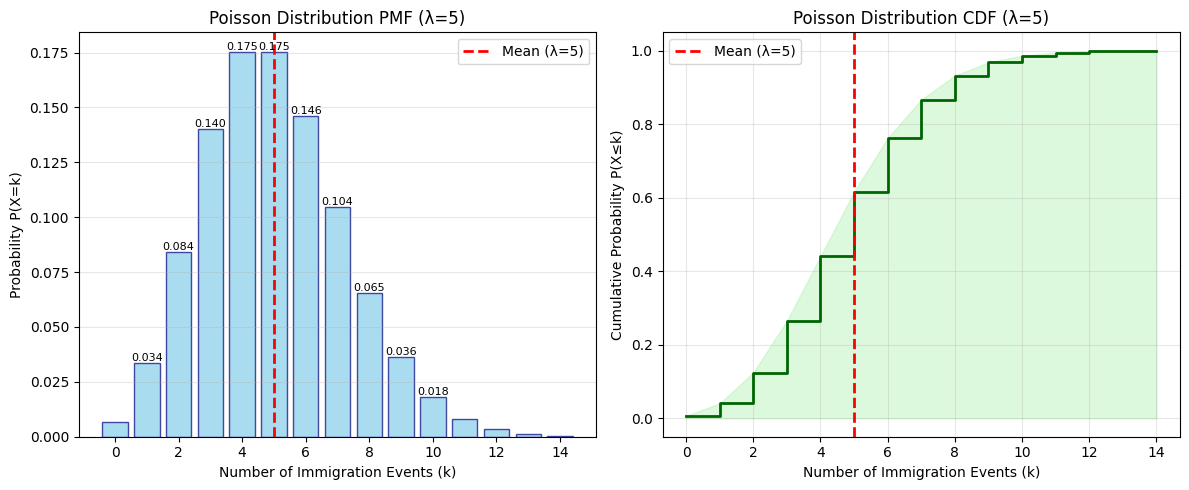

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Task 3: Poisson Distribution Analysis
lam = 5
k_values = np.arange(0, 15)
pmf_values = poisson.pmf(k_values, lam)

print("\nTask 3: Poisson Distribution Analysis")
print("=" * 50)
print(f"Rate parameter (λ): {lam}")
print(f"Expected value E[X]: {lam}")
print(f"Variance Var(X): {lam}")
print(f"Standard deviation: {np.sqrt(lam):.3f}")

# Plot Poisson distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PMF plot
bars = ax1.bar(k_values, pmf_values, alpha=0.7, color='skyblue', edgecolor='navy')
ax1.axvline(x=lam, color='red', linestyle='--', linewidth=2, label=f'Mean (λ={lam})')
ax1.set_xlabel('Number of Immigration Events (k)')
ax1.set_ylabel('Probability P(X=k)')
ax1.set_title(f'Poisson Distribution PMF (λ={lam})')
ax1.grid(True, alpha=0.3, axis='y')
ax1.legend()

# Add probability values on bars
for bar in bars:
    height = bar.get_height()
    if height > 0.01:
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# CDF plot
cdf_values = poisson.cdf(k_values, lam)
ax2.step(k_values, cdf_values, where='post', linewidth=2, color='darkgreen')
ax2.fill_between(k_values, cdf_values, alpha=0.3, color='lightgreen')
ax2.axvline(x=lam, color='red', linestyle='--', linewidth=2, label=f'Mean (λ={lam})')
ax2.set_xlabel('Number of Immigration Events (k)')
ax2.set_ylabel('Cumulative Probability P(X≤k)')
ax2.set_title(f'Poisson Distribution CDF (λ={lam})')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig('poisson_distribution_plot.png', dpi=300, bbox_inches='tight')
plt.show()


Task 4: Confidence Interval Construction
Sample data: [1050 1070 1065 1080 1045 1075 1060 1070]
Sample size (n): 8
Sample mean (x̄): 1064.4
Sample standard deviation (s): 12.08
Degrees of freedom (df): 7
t-critical value (95%): 2.365
Standard Error (SE): 4.27
Margin of Error: 10.1
95% Confidence Interval: [1054.3, 1074.5]


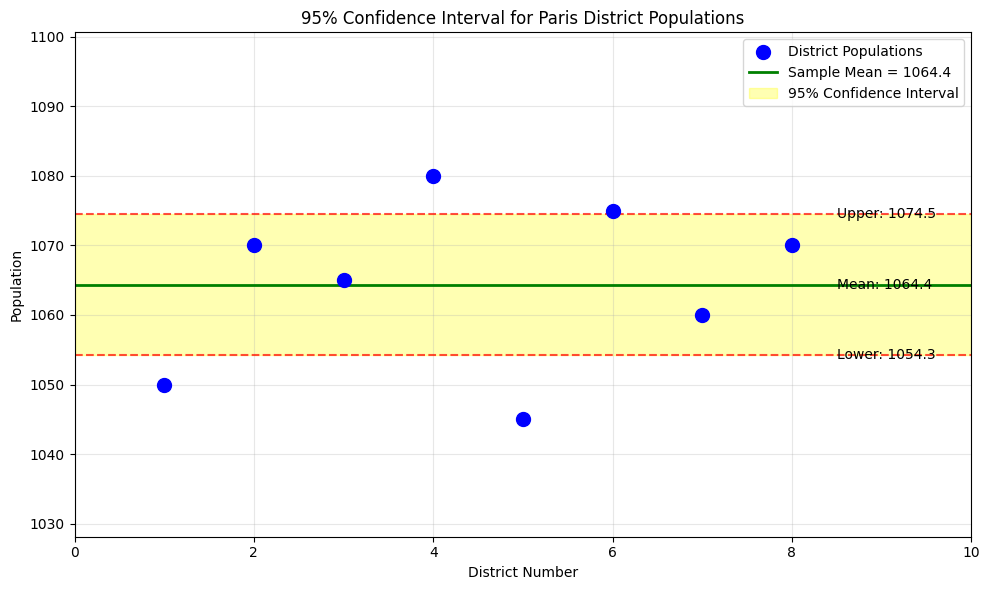

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Task 4: Confidence Interval Construction
data = np.array([1050, 1070, 1065, 1080, 1045, 1075, 1060, 1070])
n = len(data)
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
t_critical = stats.t.ppf(0.975, df=n-1)
se = sample_std / np.sqrt(n)
margin_error = t_critical * se
ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error

print("\nTask 4: Confidence Interval Construction")
print("=" * 50)
print(f"Sample data: {data}")
print(f"Sample size (n): {n}")
print(f"Sample mean (x̄): {sample_mean:.1f}")
print(f"Sample standard deviation (s): {sample_std:.2f}")
print(f"Degrees of freedom (df): {n-1}")
print(f"t-critical value (95%): {t_critical:.3f}")
print(f"Standard Error (SE): {se:.2f}")
print(f"Margin of Error: {margin_error:.1f}")
print(f"95% Confidence Interval: [{ci_lower:.1f}, {ci_upper:.1f}]")

# Plot confidence interval
fig, ax = plt.subplots(figsize=(10, 6))

# Plot individual data points
ax.scatter(range(1, n+1), data, color='blue', s=100, label='District Populations', zorder=5)
ax.axhline(y=sample_mean, color='green', linestyle='-', linewidth=2, label=f'Sample Mean = {sample_mean:.1f}')

# Plot confidence interval
ax.axhspan(ci_lower, ci_upper, alpha=0.3, color='yellow', label='95% Confidence Interval')
ax.axhline(y=ci_lower, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax.axhline(y=ci_upper, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

# Add labels for CI bounds
ax.text(n+0.5, ci_lower, f'Lower: {ci_lower:.1f}', va='center', ha='left', fontsize=10)
ax.text(n+0.5, ci_upper, f'Upper: {ci_upper:.1f}', va='center', ha='left', fontsize=10)
ax.text(n+0.5, sample_mean, f'Mean: {sample_mean:.1f}', va='center', ha='left', fontsize=10)

ax.set_xlabel('District Number')
ax.set_ylabel('Population')
ax.set_title('95% Confidence Interval for Paris District Populations')
ax.set_xlim(0, n+2)
ax.set_ylim(sample_mean - 3*sample_std, sample_mean + 3*sample_std)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('confidence_interval_plot.png', dpi=300, bbox_inches='tight')
plt.show()